# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pylab import rcParams
from google.colab import drive
%matplotlib inline

In [2]:
plt.style.use("ggplot")
rcParams['figure.figsize'] = 12, 8
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path = '/content/drive/-/DMV_Written_Tests.csv'

In [4]:
data = pd.read_csv(path)
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
scores = data[['DMV_Test_1', 'DMV_Test_2']].values
results = data['Results'].values

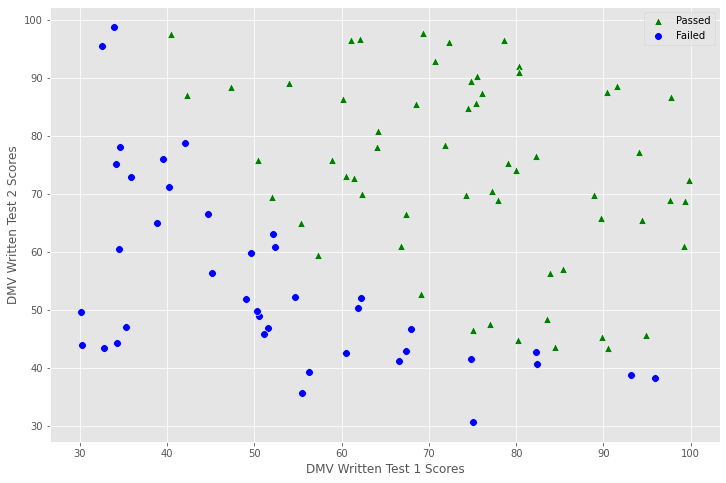

In [7]:
passed = (results == 1).reshape(100, 1)
failed = (results == 0).reshape(100, 1)
ax = sns.scatterplot(x = scores[passed[:, 0], 0], 
                     y = scores[passed[:, 0], 1],
                     marker = '^',
                     color = 'green',
                     s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0], 
                y = scores[failed[:, 0], 1],
                marker = 'o',
                color = 'blue',
                s = 60)
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
ax.legend(["Passed", "Failed"])
plt.show()

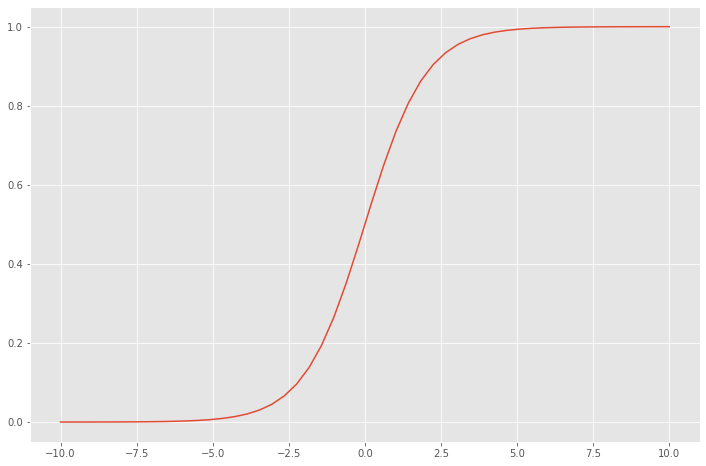

In [8]:
def logistic_function(x):
  return 1/(1 + np.exp(-x))

x  = np.linspace(-10,10,50)
y = logistic_function(x)
plt.plot(x,y)
plt.show()

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [9]:
def compute_cost(w, x, y):
    m = y.shape[0]
    y_hat = logistic_function(np.dot(x, w))
    error = (y * np.log(y_hat)) + ((1 - y) * np.log(1 - y_hat))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.T, (y_hat - y))
    return cost[0] , gradient

In [10]:
#standardization
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores 

#include bias
X = np.append(np.ones((scores.shape[0], 1)), scores, axis=1) 
y = results.reshape(scores.shape[0], 1)

w_init = np.zeros((scores.shape[1] + 1, 1))
cost, gradient = compute_cost(w_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)


Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [11]:
def gradient_descent(x, y, w, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(w, x, y)
        w -= (alpha * gradient)
        costs.append(cost)
    return w, costs

In [12]:
w, costs = gradient_descent(X, y, w_init, 1, 200)
print("Theta after running gradient descent:", w)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting cost: 0.2048938203512014


Plot $J(\theta)$ against the number of iterations of gradient descent:

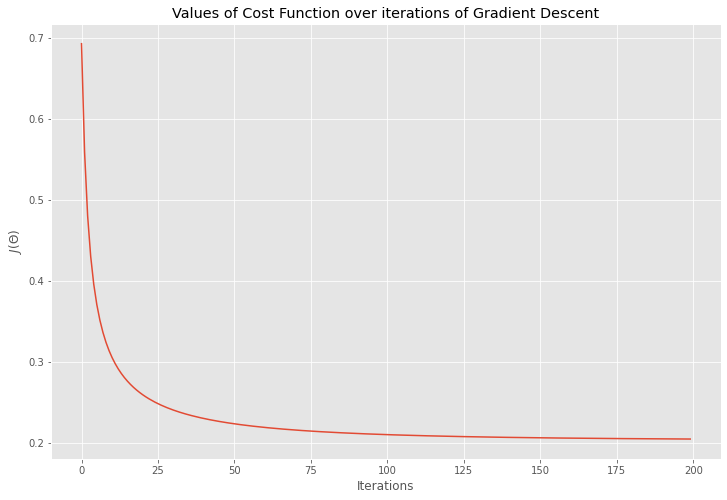

In [13]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

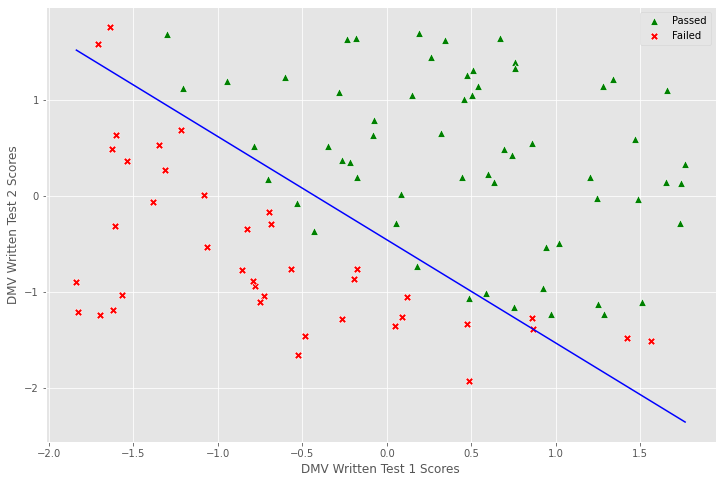

In [14]:
sns.scatterplot(x = X[passed[:, 0], 1],
                y = X[passed[:, 0], 2],
                marker = "^",
                color = "green",
                s = 60)
ax = sns.scatterplot(x = X[failed[:, 0], 1],
                    y = X[failed[:, 0], 2],
                    marker = "X",
                    color = "red",
                    s = 60)

ax.legend(["Passed", "Failed"])
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(w[0] + w[1] * x_boundary) / w[2]

sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.show();

$h_\theta(x) = x\theta$

In [15]:
def predict(theta, x):
    results = x.dot(theta)
    return results > 0

In [16]:
p = predict(w, X)
print("Training Accuracy:", sum(p==y)[0],"%")

Training Accuracy: 89 %


In [17]:
test = np.array([50,79])
test = (test - mean_scores)/std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(w))
print("A person who scores 50 and 79 on their DMV written tests have a",
      np.round(probability[0], 2),"probability of passing.")

A person who scores 50 and 79 on their DMV written tests have a 0.71 probability of passing.
